In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

print(tf.__version__)

mnist = tf.keras.datasets.mnist
# 60,000 장의 data, size -> 28 * 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)


2.1.0
(60000, 28, 28)


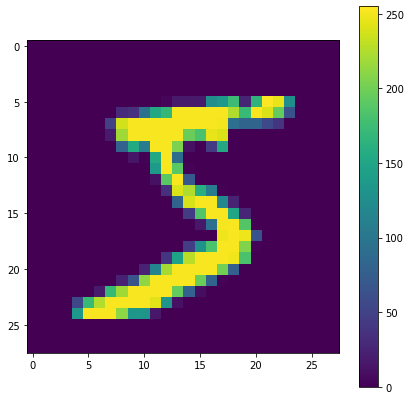

In [2]:
plt.figure(figsize=(7, 7))
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [3]:
# Data Nomalization
# x_train 한 원소의 픽셀당 0-255의 값을 가지므로 255로 나눔
x_train, x_test = x_train / 255, x_test / 255


In [4]:
# layer 만듬
# dropout 규제만듬. -> overfitting 
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', "binary_crossentropy"])

model.fit(x_train, y_train, batch_size = 1024,epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5801 - accuracy: 0.8393 - binary_crossentropy: 24.0162
Epoch 2/5
59392/60000 [============================>.] - ETA: 0s - loss: 0.2427 - accuracy: 0.9313 - binary_crossentropy: 30.90360000/60000 [==============================] - 2s 41us/sample - loss: 0.2428 - accuracy: 0.9312 - binary_crossentropy: 30.9165
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.1833 - accuracy: 0.9481 - binary_crossentropy: 32.7192
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1485 - accuracy: 0.9569 - binary_crossentropy: 34.4860
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1241 - accuracy: 0.9648 - binary_crossentropy: 35.9047


In [5]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 187us/sample - loss: 0.1147 - accuracy: 0.9670 - binary_crossentropy: 36.7163


[0.11466935580298304, 0.967, 36.716255]